## Boehm

- Fig. 6 c) Inferred ANN vs missing mechanism
- Fig. 6 f, i) Simulation into 4 panels
- Ensembles

#### Best Boehm fits
by negLL_obs_trainval

- boehm_papa_export_kinetic
    - 110
- boehm_papb_differential_BaF3_Epo
    - 296
- boehm_export_augmented
    - 147
- boehm_export_augmented 2024_11_14 preopt
    - XXX
- boehm_observable_ab_ratio
    - 10451

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import json

from petab.C import TIME, MEASUREMENT

import sys
from pathlib import Path
sys.path.append(str(Path(".").resolve().parent))

from helpers_boehm import (
    load_measurements, 
    load_simulation,
    # plot_obs_fits_together, 
    # plot_obs_fits_individually,
    load_exp_summary, 
    OBSERVABLES_IDS,
    # inverse_transform,
)

dir_pipeline = Path(".").resolve().parents[1]
dir_1 = dir_pipeline / "1_mechanistic_model"
sys.path.append(str(dir_1))
from reference_boehm import PARAMETERS_IDS, NOISE_PARAMETER_IDS, SPECIES_IDS

### Boehm Scenario 1

Fig. 6 c) Inferred ANN vs missing mechanism.
- problem ID `boehm_papa_export_kinetic`
- UDE # 110

In [ ]:
data_ref = pd.read_csv("Fig6/sim_inferred_reference/2024_08_01_Boehm_papa_export_kinetic_110_ground_truth_based.csv")
data_ude = pd.read_csv("Fig6/sim_inferred_reference/2024_08_01_Boehm_papa_export_kinetic_110_nn_based.csv")

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

marker = {
    "linestyle": "none",
    "marker": "o",
    "markersize": 6,
    'alpha': 0.8,
    'markeredgecolor': 'none',
}

# ax.plot(data_ude['ode_sim'], data_ude['nn_pred'], color="mediumpurple")
ax.plot(data_ude['ode_sim'], data_ude['nn_pred'], color="tab:blue", **marker, label="UDE #110")

# ax.plot(data_ref['ode_sim'], data_ref['nn_pred'], color="lightblue")
ax.plot(data_ref['ode_sim'], data_ref['nn_pred'], color="tab:blue", **marker, label="Reference")

ax.plot([0, 1], [0, 1], "grey", linestyle="dashed", label="Line of equality")

# ax.legend(title="Simulation")

ax.set_xlabel("Reference ODE mechanism")
ax.set_ylabel("Inferred $f_{\\text{ANN}}$")

fig.tight_layout()
fig.savefig("Fig6/residuals.svg", transparent=True)

In [ ]:
# time trajectory
fig, axes = plt.subplots(ncols=2, figsize=(6, 3), sharey=True)

ax = axes[0]
ax.plot(data_ref["ode_sim"], color="tab:green", label="Reference $f_{ODE}(x)$")
ax.plot(data_ref["nn_pred"], color="mediumorchid", label="Inferred   $f_{UDE}(x)$")
ax.set_xlabel("Time [min]")
ax.set_ylabel("pApA export")
ax.legend(loc="lower right")

ax = axes[1]
ax.plot(data_ude["ode_sim"], color="tab:green", label="Reference $f_{ODE}$")
ax.plot(data_ude["nn_pred"], color="mediumorchid", label="Inferred $f_{UDE}$")
ax.set_xlabel("Time [min]")
# ax.set_ylabel("pApA export")

fig.tight_layout()
fig.savefig("Fig6/papa_export_trajectories.svg", transparent=True)

#### Scenario 2: 
- Simulate states for *differential*
- problem name `boehm_papb_differential_BaF3_Epo`
- Best UDE: 296

In [3]:
problem_name = "boehm_papb_differential_BaF3_Epo"
experiment_date = "2024_08_21"
experiment_name = experiment_date + "_B" + problem_name[1:]

ude_id = 296

In [4]:
storage_dir = Path("/storage/groups/hasenauer_lab/sym/").resolve()
dir_exp_output = storage_dir / "5_optimisation" / experiment_name
dir_sim = storage_dir / "6_evaluation" / "simulation" / experiment_name
dir_output = Path(".").resolve() / "Fig6" / problem_name
dir_output.mkdir(parents=True, exist_ok=True)

In [17]:
with open(dir_pipeline / "problems.json", "r") as jf:
    problem = json.load(jf)[problem_name]

if "augmentation" in problem and (problem["augmentation"]["type"] == "species"):
    species_ids = list(SPECIES_IDS) + list(problem["augmentation"]["name"])
else:
    species_ids = SPECIES_IDS

In [18]:
summary = load_exp_summary(dir_exp_output)
row = summary.query("ude_nr == @ude_id")
sim = load_simulation(dir_sim, ude_id)

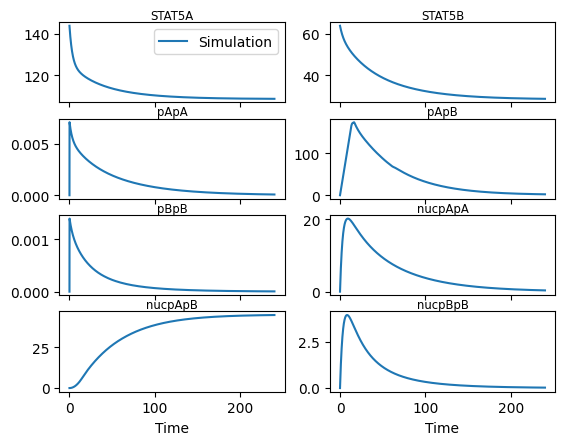

In [30]:
# plot simulation for all species

fig, axes = plt.subplots(
    nrows=math.ceil(len(species_ids) / 2), ncols=2, sharex=True
)
for ax, sid in zip(axes.flatten(), species_ids):
    # plot simulation
    ax.plot(
        sim["Time"],
        sim[sid],
        label="Simulation",
        color="tab:blue",
    )
    ax.set_title(sid,  pad=-50, fontsize="small")
for ax in axes[-1]:
    ax.set_xlabel("Time")
axes[0][0].legend();

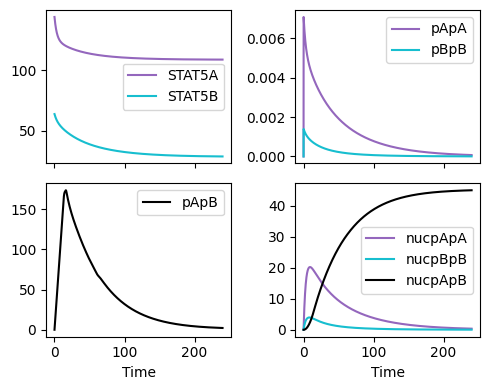

In [41]:
# plot simulation for Figure, together into 4 panels
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(5, 4))

# STAT5
for c, STAT5X in zip(("tab:purple", "tab:cyan"), ('STAT5A', 'STAT5B')):
    axes[0][0].plot(
        sim["Time"],
        sim[STAT5X],
        label=STAT5X,
        color=c,
    )

# pApA, pBpB
for c, pXpX in zip(("tab:purple", "tab:cyan"), ['pApA', 'pBpB']):
    axes[0][1].plot(
        sim["Time"],
        sim[pXpX],
        label=pXpX,
        color=c,
    )

# pApB
axes[1][0].plot(
    sim["Time"],
    sim['pApB'],
    label='pApB',
    color="k",
)

# nucpXpX
for c, nucpXpX in zip(("tab:purple", "tab:cyan", "k"), ["nucpApA", 'nucpBpB', 'nucpApB']):
    axes[1][1].plot(
        sim["Time"],
        sim[nucpXpX],
        label=nucpXpX,
        color=c,
    )

for ax in axes[-1]:
    ax.set_xlabel("Time")
for ax in axes.flatten():
    ax.legend()

fig.tight_layout()
fig.savefig(dir_output / f"sim_{ude_id}.svg", transparent=True)

#### Scenario 3: 
- Simulate states for *augmented*
- problem name `boehm_export_augmented`

In [5]:
problem_name = "boehm_export_augmented"
experiment_date = "2024_11_14"
experiment_name = experiment_date + "_B" + problem_name[1:] + "_preopt"

In [16]:
storage_dir = Path("/storage/groups/hasenauer_lab/sym/").resolve()
dir_exp_output = storage_dir / "5_optimisation" / experiment_name
dir_sim = storage_dir / "6_evaluation" / "simulation" / experiment_name
dir_output = Path(".").resolve() / "Fig4" / problem_name
dir_output.mkdir(parents=True, exist_ok=True)

In [17]:
with open(dir_pipeline / "problems.json", "r") as jf:
    problem = json.load(jf)[problem_name]

if "augmentation" in problem and (problem["augmentation"]["type"] == "species"):
    species_ids = list(SPECIES_IDS) + list(problem["augmentation"]["name"])
else:
    species_ids = SPECIES_IDS

In [45]:
# find the UDE with the best training loss 
ude_id = summary.sort_values(by="negLL_obs_trainval")["ude_nr"].values[0]
print(ude_id)

summary = load_exp_summary(dir_exp_output)
row = summary.query("ude_nr == @ude_id")
sim = load_simulation(dir_sim, ude_id)

245


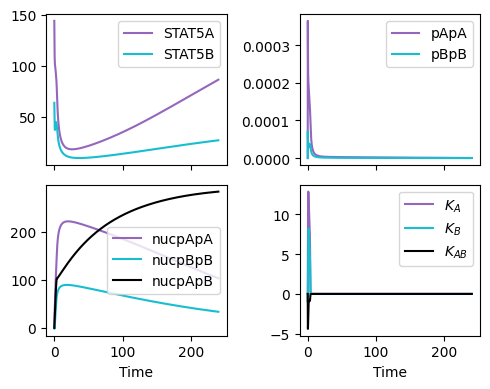

In [46]:
# plot simulation for Figure, together into 4 panels
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(5, 4))

# STAT5
for c, STAT5X in zip(("tab:purple", "tab:cyan"), ('STAT5A', 'STAT5B')):
    axes[0][0].plot(
        sim["Time"],
        sim[STAT5X],
        label=STAT5X,
        color=c,
    )

# pXpX
# for c, pXpX in zip(("tab:purple", "tab:cyan", "k"), ['pApA', 'pBpB', 'pApB']):
for c, pXpX in zip(("tab:purple", "tab:cyan"), ['pApA', 'pBpB']):
    axes[0][1].plot(
        sim["Time"],
        sim[pXpX],
        label=pXpX,
        color=c,
    )

# nucpXpX
for c, nucpXpX in zip(("tab:purple", "tab:cyan", "k"), ["nucpApA", 'nucpBpB', 'nucpApB']):
    axes[1][0].plot(
        sim["Time"],
        sim[nucpXpX],
        label=nucpXpX,
        color=c,
    )

# KX
for c, KX, label in zip(("tab:purple", "tab:cyan", "k"), ('K_A', 'K_B', 'K_AB'), ('K_A', 'K_B', 'K_{AB}')):
    axes[1][1].plot(
        sim["Time"],
        sim[KX],
        label=f"${label}$",
        color=c,
    )

for ax in axes[-1]:
    ax.set_xlabel("Time")
for ax in axes.flatten():
    ax.legend()

fig.tight_layout()
fig.savefig(dir_output / f"sim_{ude_id}.svg", transparent=True)

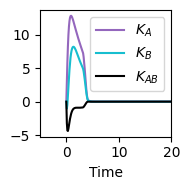

In [47]:
# zoom into augmenting species
fig, ax = plt.subplots(figsize=(2, 2))
# KX
for c, KX, label in zip(("tab:purple", "tab:cyan", "k"), ('K_A', 'K_B', 'K_AB'), ('K_A', 'K_B', 'K_{AB}')):
    ax.plot(
        sim["Time"],
        sim[KX],
        label=f"${label}$",
        color=c,
    )
ax.set_xlabel("Time")
# ax.set_xscale("log")
ax.set_xlim(-5, 20)
ax.legend()
fig.tight_layout()
fig.savefig(dir_output / f"sim_augmented_{ude_id}.svg", transparent=True)

#### Scenario 4: 
- Simulate states for *observable*
- problem name `boehm_observable_ab_ratio`
- UDE ID 10451

In [6]:
problem_name = "boehm_observable_ab_ratio"
experiment_date = "2024_08_11"
experiment_name = experiment_date + "_B" + problem_name[1:]

In [34]:
storage_dir = Path("/storage/groups/hasenauer_lab/sym/").resolve()
dir_exp_output = storage_dir / "5_optimisation" / experiment_name
dir_sim = storage_dir / "6_evaluation" / "simulation" / experiment_name
dir_output = Path(".").resolve() / "Fig4" / problem_name
dir_output.mkdir(parents=True, exist_ok=True)

In [35]:
with open(dir_pipeline / "problems.json", "r") as jf:
    problem = json.load(jf)[problem_name]

if "augmentation" in problem and (problem["augmentation"]["type"] == "species"):
    species_ids = list(SPECIES_IDS) + list(problem["augmentation"]["name"])
else:
    species_ids = SPECIES_IDS

In [36]:
summary = load_exp_summary(dir_exp_output)

# plot an ensemble
n_ens = 25

metric = "negLL_obs_trainval"
summary = summary.sort_values(by=metric)
sims_ensemble = [load_simulation(dir_sim, uid) for uid in summary["ude_nr"][:n_ens]]

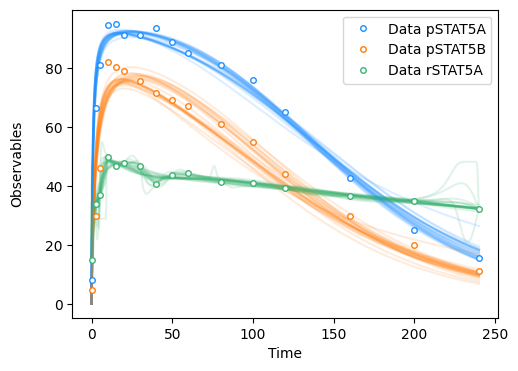

In [37]:
# plot the ensemble fit
fig, ax = plt.subplots(figsize=(5.5, 4))

# ensemble of fits
for simulation in sims_ensemble:
    for observable_id, colour in zip(
        OBSERVABLES_IDS, ("dodgerblue", "tab:orange", "mediumseagreen")
    ):
        ax.plot(
            simulation["Time"],
            simulation[observable_id],
            # label=f"Fit {observable_id[:-4]}",
            color=colour,
            alpha=0.15,
        )

# measurement data
df_data = load_measurements()
for observable_id, colour in zip(
    OBSERVABLES_IDS, ("dodgerblue", "tab:orange", "mediumseagreen")
):
    ax.plot(
        df_data.query(f"observableId == @observable_id")[TIME],
        df_data.query(f"observableId == @observable_id")[MEASUREMENT],
        label=f"Data {observable_id[:-4]}",
        marker="o",
        linestyle="",
        markerfacecolor="white",
        markersize=4,
        color=colour,
    )

ax.set_ylabel("Observables", labelpad=15)

ax.set_xlabel("Time")
# legend without duplicate labels
# handles, labels = ax.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys())
ax.legend()
fig.savefig(dir_output / f"fit_ensemble_{n_ens}.svg", transparent=True)

#### Parameter convergence for the UDEs in the ensemble plot

In [12]:
import h5py
import pypesto
import pypesto.petab
import pypesto.visualize as vis

dir_5 = dir_pipeline / "5_optimisation"

In [13]:
metric = "negLL_obs_trainval"

def load_opt_parameters(fp):
    try:
        f = h5py.File(fp, "r")
    except FileNotFoundError:
        return [None] * 20
    return f[f["p_opt"][()][0]][()]

# import Boehm from benchmark collection to use pypesto problem
import benchmark_models_petab as bmp
petab_problem = bmp.get_problem("Boehm_JProteomeRes2014")
pypesto_importer = pypesto.petab.PetabImporter(petab_problem)
pypesto_problem = pypesto_importer.create_problem()

Compiling amici model to folder /home/maren/ude_pipeline/6_evaluation/notebooks/amici_models/0.25.2/Boehm_JProteomeRes2014.
2024-10-08 23:23:52.593 - amici.petab.sbml_import - INFO - Importing model ...
2024-10-08 23:23:52.594 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
2024-10-08 23:23:52.620 - amici.petab.sbml_import - INFO - Model name is 'Boehm_JProteomeRes2014'.
Writing model code to '/home/maren/ude_pipeline/6_evaluation/notebooks/amici_models/0.25.2/Boehm_JProteomeRes2014'.
2024-10-08 23:23:52.621 - amici.petab.sbml_import - INFO - Species: 8
2024-10-08 23:23:52.622 - amici.petab.sbml_import - INFO - Global parameters: 9
2024-10-08 23:23:52.622 - amici.petab.sbml_import - INFO - Reactions: 9
2024-10-08 23:23:52.644 - amici.petab.sbml_import - INFO - Observables: 3
2024-10-08 23:23:52.645 - amici.petab.sbml_import - INFO - Sigmas: 3
2024-10-08 23:23:52.648 - amici.petab.sbml_import - DEBUG - Adding output parameters to model: ['noiseParameter1_pSTAT5A_rel', 'n

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 12.2.0
-- The CXX compiler identification is GNU 12.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /opt/ohpc/pub/compiler/gcc/12.2.0/install/usr/local/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /opt/ohpc/pub/compiler/gcc/12.2.0/install/usr/local/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing T

In [5]:
def inverse_transform(x, lb=1e-5, ub=1e5):
    """Inverse parameter transform for the tanh bounds."""
    lb = lb * (1-1e-6)
    ub = ub * (1+1e-6)
    return lb + (np.tanh(x-1.73) + 1)/2*(ub-lb)

In [50]:
# create a pypesto result with fval and opt' parameters
optimize_result = pypesto.result.OptimizeResult()
for start_id, v in list(summary.sort_values(by=metric)[[metric, "ude_nr"]].T.to_dict().items())[:100]:
    fp_p_opt = dir_exp_output / "result" / f"ude_{int(v['ude_nr'])}" / "p_opt.jld2"
    x = [np.log10(inverse_transform(xi)) for xi in load_opt_parameters(fp_p_opt)[:len(PARAMETERS_IDS)]]
    single_result = pypesto.result.OptimizerResult(**{"id": str(start_id), "fval": v[metric], "x": x})
    optimize_result.append(single_result)
pypesto_result = pypesto.Result(optimize_result=optimize_result)
pypesto_result.problem = pypesto_problem

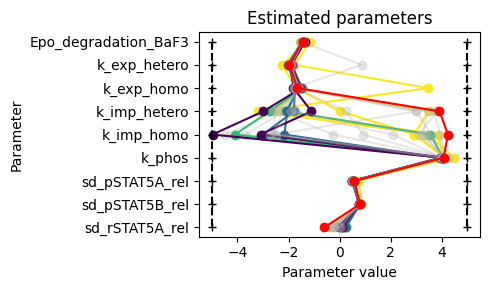

In [54]:
n_p = n_ens
fig, ax = plt.subplots(figsize=(5, 3))
pypesto.visualize.parameters(pypesto_result, size=(4, 3), start_indices=list(range(n_p)), ax=ax)
fig.tight_layout()
fig.savefig(dir_output / f"parameters_{n_p}.svg")